In [1]:
### Import libraries ###
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Numerical Differntiation:  Finate Method

We can use Taylor series expansions to obtain the approximations of the derivatives in finite divided differences. We can either obtain the forward, backward, or centered difference approach. When dealing with this approximation , the error is at best $ O(h2)$ that is, the error is proportional to the step size square. This level of accuracy is due to the number of terms in the Taylor series that are used during the derivation of these formulas. 

Taylor series:
$$ f(x) |_c= \sum_{n=0}^{\infty}\frac{f^{n}(c)(x-c)^{n}}{n!}$$

It is importatn to keep in mind that a $n_{Th}$ order method of a first derivative needs $p=n+1$ points
<br>
More importantly  a $n_{Th}$ order method  of a $m_{Th}$  derivative will return $ p=n-(m-1)$ points

## 1 Forward Methods

### First derivative:
<font color="blue">First order (2 points):</font>

$$ f^{'}(x_i) = \frac{ f(x_{i+1}) - f(x_i)}{h} $$

<font color="green">Second order (3 points):</font>

$$ f^{'}(x_i) = \frac{ -f(x_{i+2}) + 4f(x_{i+1})- 3f(x_i)}{2h} $$
        
 

In [2]:
def f1_1(x,f_x):
    """Finate Differnece First Derivative First Order: (input):
    x:   a vector of size (n,)
    f_x: a vector of size (n,)
    f1:  a derivative vector of size (n-1, )"""
    order_m  = 1               # Order of method
    order_d  = 1               # Order of Derivative 
    total_order = order_m + (order_d-1) # total order
    n=len(x)                 # Number of points
    h=(x[-1]-x[-0])/(n-1)    # Step of function
    f1 =  np.zeros((n-total_order))# Init a vector of n-order lenth
    ## Iterate n-order times ###
    for i in range(0,n-total_order):
            f1[i] = (f_x[i+1]-f_x[i])/h # First Derivative, Order 1
            
    return  f1 

def f1_2(x,f_x):
    """Finate Differnece First Derivative Second Order: (input):
    x:   a vector of size (n,)
    f_x: a vector of size (n,)
    f1:  a derivative vector of size (n-2, )"""
    order_m  = 2               # Order of method
    order_d  = 1               # Order of Derivative 
    total_order = order_m + (order_d-1) # total order
    n=len(x)                 # Number of points
    h=(x[-1]-x[-0])/(n-1)    # Step of function
    f1 =  np.zeros((n-total_order))# Init a vector of n-order lenth
    ## Iterate n-order times ###
    for i in range(0,n-total_order):
            f1[i] = (-f_x[i+2] + 4*f_x[i+1] - 3*f_x[i])/(2*h) # First Derivative, Order 1
            
    return  f1 


### Example ###
n=50                    # Number of points
x=np.linspace(0,10,n)  # Create a vector of n points in the inteval [a,b]
f_x  = np.exp(-x) + np.sin (x) # Evaluate in on function (so we have points to work with)
f1_x = -np.exp(-x) + np.cos(x) # Evaluate the derivative (For the sake of compering)

f1_1 = f1_1(x,f_x)
f1_2 = f1_2(x,f_x)

In [3]:
print(f"Whished length: {len(f1_x)}\nlength for 1st derivative order 1: {len(f1_1)}\nlength for 1st derivative order 2: {len(f1_2)}")

Whished length: 50
length for 1st derivative order 1: 49
length for 1st derivative order 2: 48


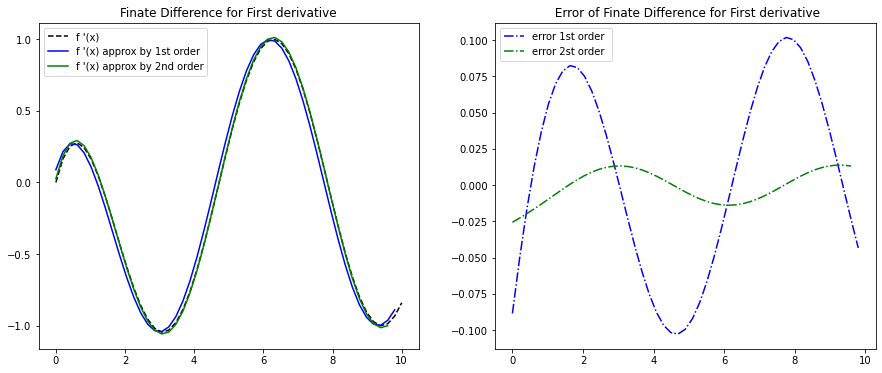

In [4]:
### caclulate error ###
error1 = f1_x[0:len(x)-1] - f1_1
error2 = f1_x[0:len(x)-2] - f1_2

### Plot ###
fig,axes = plt.subplots(figsize=(15,6),ncols=2,nrows=1)

axes[0].plot(x,f1_x,"k--",label="f '(x)")
axes[0].plot(x[0:len(x)-1],f1_1,"b-",label="f '(x) approx by 1st order")
axes[0].plot(x[0:len(x)-2],f1_2,"g-",label="f '(x) approx by 2nd order")
axes[0].legend(loc="best")

axes[1].plot(x[0:len(x)-1],error1,'b-.',label="error 1st order ")
axes[1].plot(x[0:len(x)-2],error2,'g-.',label="error 2st order ")
axes[1].legend(loc="best")

### Make Plot Pretty ###
axes[0].set_title("Finate Difference for First derivative")
axes[1].set_title(" Error of Finate Difference for First derivative")
plt.show()

### Second derivative:
<font color="blue">First order (3 points):</font>

$$ f^{''}(x_i) = \frac{ f(x_{i+2}) - 2f(x_{i+1})+f(x_i)}{h^2} $$

<font color="green">Second order (4 points):</font>

$$ f^{''}(x_i) = \frac{ -f(x_{i+3}) + 4f(x_{i+2})- 5f(x_{i+1})+2f(x_i)}{h^2} $$
        
 

In [7]:
def f2_1(x,f_x):
    """Finate Differnece Second Derivative First Order: (input):
    x:   a vector of size (n,)
    f_x: a vector of size (n,)
    f1:  a derivative vector of size (n-2, )"""
    
    order_m  = 1               # Order of method
    order_d  = 2               # Order of Derivative 
    total_order = order_m + (order_d-1) # total order
    n=len(x)                 # Number of points
    h=(x[-1]-x[-0])/(n-1)    # Step of function
    f2 =  np.zeros((n- total_order))# Init a vector of n-order lenth
    ## Iterate n-order times ###
    for i in range(0,n-total_order):
            f2[i] = (f_x[i+2]-2*f_x[i+1]+f_x[i])/(h**2)# Second Derivative, Order 1
            
    return  f2 


def f2_2(x,f_x):
    """Finate Differnece Second Derivative Second Order: (input):
    x:   a vector of size (n,)
    f_x: a vector of size (n,)
    f1:  a derivative vector of size (n-3, )"""
    
    order_m  = 2               # Order of method
    order_d  = 2               # Order of Derivative 
    total_order = order_m + (order_d-1) # total order
    n=len(x)                 # Number of points
    h=(x[-1]-x[-0])/(n-1)    # Step of function
    f2 =  np.zeros((n- total_order))# Init a vector of n-order lenth
    ## Iterate n-order times ###
    for i in range(0,n-total_order):
            f2[i] = (-f_x[i+3] + 4*f_x[i+2] - 5*f_x[i+1]+2*f_x[i])/(h**2) # First Derivative, Order 1
            
    return  f2
### Example ###
n=50                 # Number of points
x=np.linspace(0,10,n)  # Create a vector of n points in the inteval [a,b]
f_x  = np.exp(-x) + np.sin (x) # Evaluate in on function (so we have points to work with)
f2_x = np.exp(-x) - np.sin (x) # Evaluate the derivative (For the sake of compering)

f2_1 = f2_1(x,f_x)
f2_2 = f2_2(x,f_x)

In [8]:
print(f"Whished length: {len(f2_x)}\nlength for 2nd derivative order 1: {len(f2_1)}\nlength for 2nd derivative order 2: {len(f2_2)}")

Whished length: 50
length for 2nd derivative order 1: 48
length for 2nd derivative order 2: 47


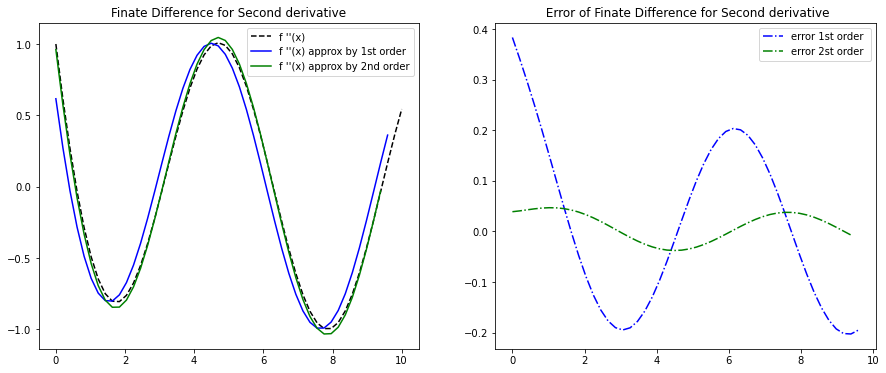

In [9]:
error1 = f2_x[0:len(x)-2] - f2_1
error2 = f2_x[0:len(x)-3] - f2_2
### Plot ###
### Plot ###
fig,axes = plt.subplots(figsize=(15,6),ncols=2,nrows=1)

axes[0].plot(x,f2_x,"k--",label="f ''(x)")
axes[0].plot(x[0:len(x)-2],f2_1,"b-",label="f ''(x) approx by 1st order")
axes[0].plot(x[0:len(x)-3],f2_2,"g-",label="f ''(x) approx by 2nd order")
axes[0].legend(loc="best")

axes[1].plot(x[0:len(x)-2],error1,'b-.',label="error 1st order ")
axes[1].plot(x[0:len(x)-3],error2,'g-.',label="error 2st order ")
axes[1].legend(loc="best")

### Make Plot Pretty ###
axes[0].set_title("Finate Difference for Second derivative")
axes[1].set_title(" Error of Finate Difference for Second derivative")
plt.show()


###  Third derivative:
<font color="blue">First order (4 points):</font>

$$ f^{'''}(x_i) = \frac{ f(x_{i+3}) -3f(x_{i+2}) + 3f(x_{i+1})+f(x_i)}{h^3} $$

<font color="green">Second order (5 points):</font>

$$ f^{'''}(x_i) = \frac{ -3f(x_{i+4}) + 14f(x_{i+3})- 24f(x_{i+2})+18f(x_{i+1})-5f(x_i)}{2h^3} $$
        
 

In [10]:
def f3_1(x,f_x):
    """Finate Differnece Third Derivative First Order: (input):
    x:   a vector of size (n,)
    f_x: a vector of size (n,)
    f1:  a derivative vector of size (n-2, )"""
    
    order_m  = 1               # Order of method
    order_d  = 3               # Order of Derivative 
    total_order = order_m + (order_d-1) # total order
    n=len(x)                 # Number of points
    h=(x[-1]-x[-0])/(n-1)    # Step of function
    f3 =  np.zeros((n- total_order))# Init a vector of n-order lenth
    ## Iterate n-order times ###
    for i in range(0,n-total_order):
            f3[i] = (f_x[i+3]-3*f_x[i+2]+3*f_x[i+1]-f_x[i])/(h**3)# Second Derivative, Order 1
            
    return  f3 


def f3_2(x,f_x):
    """Finate Differnece Third Derivative Second Order: (input):
    x:   a vector of size (n,)
    f_x: a vector of size (n,)
    f1:  a derivative vector of size (n-3, )"""
    
    order_m  = 2               # Order of method
    order_d  = 3               # Order of Derivative 
    total_order = order_m + (order_d-1) # total order
    n=len(x)                 # Number of points
    h=(x[-1]-x[-0])/(n-1)    # Step of function
    f3 =  np.zeros((n- total_order))# Init a vector of n-order lenth
    ## Iterate n-order times ###
    for i in range(0,n-total_order):
            f3[i] = (-3*f_x[i+4]+14*f_x[i+3] -24*f_x[i+2] + 18*f_x[i+1]-5*f_x[i])/(2*h**3) # First Derivative, Order 1
            
    return  f3

### Example ###
n=50                 # Number of points
x=np.linspace(0,10,n)  # Create a vector of n points in the inteval [a,b]
f_x  = np.exp(-x) + np.sin (x) # Evaluate in on function (so we have points to work with)
f3_x = -np.exp(-x) - np.cos(x) # Evaluate the derivative (For the sake of compering)

f3_1 = f3_1(x,f_x)
f3_2 = f3_2(x,f_x)

In [11]:
print(f"Whished length: {len(f3_x)}\nlength for 2nd derivative order 1: {len(f3_1)}\nlength for 2nd derivative order 2: {len(f3_2)}")

Whished length: 50
length for 2nd derivative order 1: 47
length for 2nd derivative order 2: 46


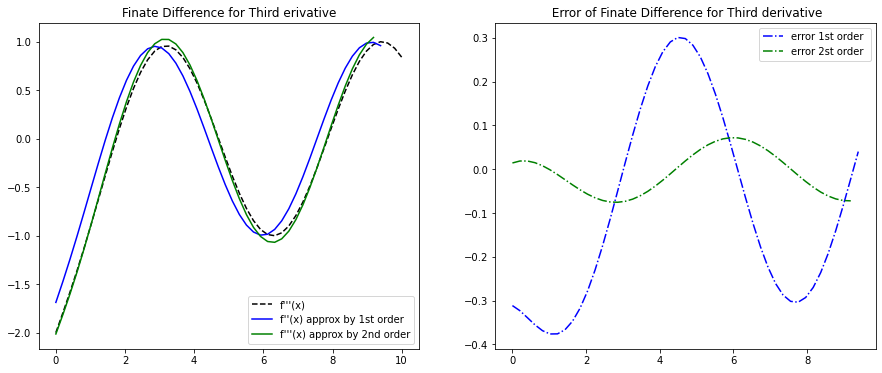

In [12]:
error1 = f3_x[0:len(x)-3] - f3_1
error2 = f3_x[0:len(x)-4] - f3_2
### Plot ###
### Plot ###
fig,axes = plt.subplots(figsize=(15,6),ncols=2,nrows=1)

axes[0].plot(x,f3_x,"k--",label="f'''(x)")
axes[0].plot(x[0:len(x)-3],f3_1,"b-",label="f''(x) approx by 1st order")
axes[0].plot(x[0:len(x)-4],f3_2,"g-",label="f'''(x) approx by 2nd order")
axes[0].legend(loc="best")

axes[1].plot(x[0:len(x)-3],error1,'b-.',label="error 1st order ")
axes[1].plot(x[0:len(x)-4],error2,'g-.',label="error 2st order ")
axes[1].legend(loc="best")

### Make Plot Pretty ###
axes[0].set_title("Finate Difference for Third erivative")
axes[1].set_title(" Error of Finate Difference for Third derivative")
plt.show()


###  Fourth  derivative:
<font color="blue">First order (5 points):</font>

$$ f^{''''}(x_i) = \frac{f(x_{i+4}) -4f(x_{i+3}) +6f(x_{i+2}) -4f(x_{i+1})+f(x_i)}{h^4} $$

<font color="green">Second order (6 points):</font>

$$ f^{''''}(x_i) = \frac{ -2f(x_{i+5}) +11f(x_{i+4}) -24f(x_{i+3})+26f(x_{i+2})-14f(x_{i+1})+3f(x_i)}{h^4} $$

In [13]:
def f4_1(x,f_x):
    """Finate Differnece Third Derivative First Order: (input):
    x:   a vector of size (n,)
    f_x: a vector of size (n,)
    f1:  a derivative vector of size (n-2, )"""
    
    order_m  = 1               # Order of method
    order_d  = 4               # Order of Derivative 
    total_order = order_m + (order_d-1) # total order
    n=len(x)                 # Number of points
    h=(x[-1]-x[-0])/(n-1)    # Step of function
    f4 =  np.zeros((n- total_order))# Init a vector of n-order lenth
    ## Iterate n-order times ###
    for i in range(0,n-total_order):
            f4[i] = (f_x[i+4]-4*f_x[i+3]+6*f_x[i+2]-4*f_x[i+1]+f_x[i])/(h**4)# Second Derivative, Order 1
            
    return  f4 


def f4_2(x,f_x):
    """Finate Differnece Third Derivative Second Order: (input):
    x:   a vector of size (n,)
    f_x: a vector of size (n,)
    f1:  a derivative vector of size (n-3, )"""
    
    order_m  = 2               # Order of method
    order_d  = 4               # Order of Derivative 
    total_order = order_m + (order_d-1) # total order
    n=len(x)                 # Number of points
    h=(x[-1]-x[-0])/(n-1)    # Step of function
    f4 =  np.zeros((n- total_order))# Init a vector of n-order lenth
    ## Iterate n-order times ###
    for i in range(0,n-total_order):
            f4[i] = (-2*f_x[i+5]+11*f_x[i+4]-24*f_x[i+3]+26*f_x[i+2]-14*f_x[i+1]+3*f_x[i])/(h**4) # First Derivative, Order 1
            
    return  f4

### Example ###
n=50                 # Number of points
x=np.linspace(0,10,n)  # Create a vector of n points in the inteval [a,b]
f_x  =  np.exp(-x) + np.sin (x) # Evaluate in on function (so we have points to work with)
f4_x =  np.exp(-x) + np.sin (x) # Evaluate the derivative (For the sake of compering)

f4_1 = f4_1(x,f_x)
f4_2 = f4_2(x,f_x)

In [14]:
print(f"Whished length: {len(f4_x)}\nlength for 2nd derivative order 1: {len(f4_1)}\nlength for 2nd derivative order 2: {len(f4_2)}")

Whished length: 50
length for 2nd derivative order 1: 46
length for 2nd derivative order 2: 45


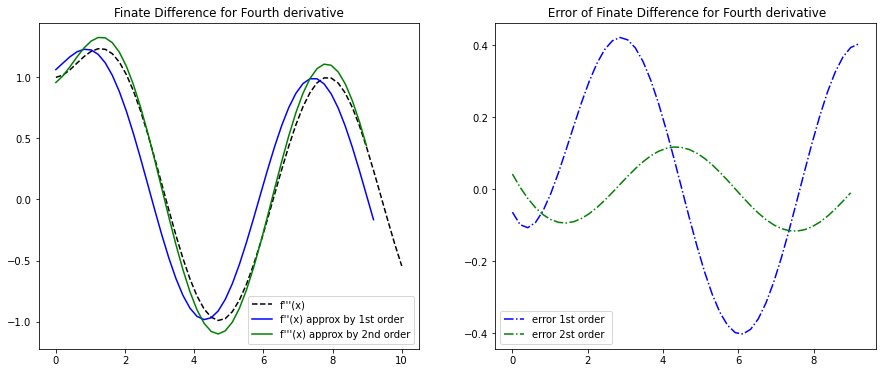

In [15]:
error1 = f4_x[0:len(x)-4] - f4_1
error2 = f4_x[0:len(x)-5] - f4_2
### Plot ###
### Plot ###
fig,axes = plt.subplots(figsize=(15,6),ncols=2,nrows=1)

axes[0].plot(x,f4_x,"k--",label="f'''(x)")
axes[0].plot(x[0:len(x)-4],f4_1,"b-",label="f''(x) approx by 1st order")
axes[0].plot(x[0:len(x)-5],f4_2,"g-",label="f'''(x) approx by 2nd order")
axes[0].legend(loc="best")

axes[1].plot(x[0:len(x)-4],error1,'b-.',label="error 1st order ")
axes[1].plot(x[0:len(x)-5],error2,'g-.',label="error 2st order ")
axes[1].legend(loc="best")

### Make Plot Pretty ###
axes[0].set_title("Finate Difference for Fourth derivative")
axes[1].set_title(" Error of Finate Difference for Fourth derivative")
plt.show()

## 2.- Middle Methods